In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# <font color='firebrick'> House Prices - Advanced Regression Techniques  </font>

### Predict sales prices and practice feature engineering, RFs, and gradient boosting

# <font color='goldenrod'> Introduction </font>

### <font color='black'> Problem Description <font>

This project is addressing factors which can influence price negotiations besides the number of bedrooms or a white-picket fence in the real estate realm.

- Two types of dataset are provided: training data set and test data set. In fact, the training data set is the initial dataset we will use to teach our machine learning models to recognize patterns or to extract features that are relevant to this specific goal. while the test data set will be used to evaluate the model’s accuracy and to make prediction as well.

- Both data sets we have at hand consist of 79 explanatory variables describing (almost) every aspect of residential homes in Ames and Iowa. See [Data](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) for full description. 

- Our goal is to predict the final price of each home. That's, for each Id in the test data set, we want to predict the value of the SalePrice variable.

- Personally, this project is timely in that a wide range of Machine Learning algorithms will be revisited including: Linear Regression, Rigide Regression, Lasso Regression, SVM, Random Forest Regression, XGBoost and so forth.

- Finally, my major contribution to Kaggle's Community is all about some new approaches for conducting data analysis tasks based on a deep scientific thinking focused on the "Why" instead of only the "How".

### <font color='black'> Step-by-Step Procedure <font>

<font color='darkblue'> In order to tackle efficiently this project, we will follow the steps below suggested by [A. Qua](https://www.kaggle.com/adibouayjan). <front>
    
I.	Explarotory data analysis
    
    I.1. General exploration

    I.2. Numerical features
        I.2.1. Explore and clean Numerical features
        I.2.2. Missing data of Numerical features

    I.3. Categorical features
        I.3.1. Explore and clean Categorical features
        I.3.2. Missing data of Categorical features
        I.3.3. Transform Categorical features into Binary features (get_dummies)

    I.4. Merge numerical and binary features into one data set
    
    I.5. Drop outliers from the train set

II.	Feature engineering

III.	Preparing data for modeling
    
    III.1. Split data into train and test and Standardization

    III.2. Backward Stepwise Regression

    III.3. Variance Inflation Factor

    III.4. Cook distance

IV.	Modeling

    IV.1. Models and metrics selection

    IV.2. Hyperparameters tuning and model optimization
        IV.2.1. Ridge regression
        IV.2.2. Lasso regression
        IV.2.3. XGBoost regression
        IV.2.4. LightGBM regression

    IV.3. Choosing the best model

 V.	Prediction

# <font color='goldenrod'> I. Exploratory Data Analysis </font>

These are the core parts of this session, based on the work of [Pedro Marcelino, Ph.D.](https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook): 
    
* Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
    
* Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
    
* Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
    
* Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
    
* Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.


### <font color='forestgreen'>  I.1. General Exploration <front>

#### 1.1. Loading libraries

In [19]:
import pandas as pd

Pandas is a Python library for data analysis. Started by Wes McKinney in 2008 out of a need for a powerful and flexible quantitative analysis tool, pandas has grown into one of the most popular Python libraries. It has an extremely active community of contributors. 
Pandas features: 

* Times series Analysis
* Split-Apply-Combine
* Data visualisation
* Pivot Table
    
See [Pandas](https://mode.com/python-tutorial/libraries/pandas/) for more details. 

In [20]:
import matplotlib.pyplot as plt
from matplotlib import patches

Matplotlib is a python library used to create 2D graphs and plots by using python scripts. It has a module named pyplot which makes things easy for plotting by providing feature to control line styles, font properties, formatting axes etc. It supports a very wide variety of graphs and plots namely - histogram, bar charts, power spectra, error charts etc. 

See [Matplotlib](https://matplotlib.org) for more details. 

In [21]:
import seaborn as sns

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

See [Seaborn](https://seaborn.pydata.org) for more details. 

In [22]:
import numpy as np

NumPy brings the computational power of languages like C and Fortran to Python. With this power comes simplicity: a solution in NumPy is often clear and elegant.

See [NumPy](https://numpy.org) for more details. 

In [23]:
import warnings

Warnings are provided to warn the developer of situations that aren’t necessarily exceptions. Usually, a warning occurs when there is some obsolete of certain programming elements, such as keyword, function or class, etc. A warning in a program is distinct from an error. Python program terminates immediately if an error occurs. 

Conversely, a warning is not critical. It shows some message, but the program runs. The warn() function defined in the ‘warning‘ module is used to show warning messages. The warning module is actually a subclass of Exception which is a built-in class in Python. 

See [Warning](https://docs.python.org/3/library/warnings.html) for more details. 

In [24]:
import statsmodels.api as sm #Cross-sectional models and methods.
import statsmodels.formula.api as smf #A convenience interface for specifying models using formula strings and DataFrames.

Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

See [Statsmodels](https://www.statsmodels.org/stable/index.html) for more details. 

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

The variance inflation factor is a measure for the increase of the variance of the parameter estimates if an additional variable, given by exog_idx is added to the linear regression. It is a measure for multicollinearity of the design matrix, exog.

One recommendation is that if VIF is greater than 5, then the explanatory variable given by exog_idx is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

In [26]:
import sklearn

Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python. This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib.

See [Sckit-learn](https://www.tutorialspoint.com/scikit_learn/index.htm) for more details. 

In [27]:
# Function to deal with missing values via imputation
from sklearn.impute import SimpleImputer

In [28]:
# Function that converts categorical values into numerical values via ordinal encoding or one-hot encoding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [29]:
# Function to split data into different groups
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold


In [30]:
# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

SciPy is a scientific computation library that uses NumPy underneath. SciPy stands for Scientific Python. It provides more utility functions for optimization, stats and signal processing. Like NumPy, SciPy is open source so we can use it freely. SciPy was created by NumPy's creator Travis Olliphant.

See [SciPy](https://scipy.org) for further details. 

In [31]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
%matplotlib inline 

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (20, 15)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

#### 1.2. Loading the Data sets 

In [34]:
# Train set
df_train = pd.read_csv("train.csv")

# Printing the Training set
print(df_train)
 
# Checking the dimensions of this dataset
print(df_train.shape)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [35]:
# Using f-string 
print(f"Train set shape: {df_train.shape} \n")

Train set shape: (1460, 81) 



In [38]:
# Test set
df_test = pd.read_csv("test.csv")

# Printing the Training set
print(df_test)

# Checking the dimensions of this dataset
#print(df_test.shape)

df_test.head()

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [39]:
# Using f-string 
print(f"Train set shape: {df_test.shape} \n")

Train set shape: (1459, 80) 



* Firstly, the training set and the test set have the same sample size. 

* Secondly, tt's worth noticing that the test set contains one veraible less than the training set. Obviously, we might suspect that this variable is "SalePrice" since our purpose is to predict its value based on the test set. Consequently, our training set is a lebeled one setting up a supervised learning framework. 

* Finally, the raw data displayed reveals that there are some quasi-constant Features: One of the values is dominant. No worries, we will certainly tackle this issue later on while processing numerical features. 

But at this point, let's check the second claim using the commands below.

In [40]:
# Checking if column headings are the same in both data set
dif_1 = [x for x in df_train.columns if x not in df_test.columns]
print(f"Columns present in df_train and absent in df_test: {dif_1}\n")

dif_2 = [x for x in df_test.columns if x not in df_train.columns]
print(f"Columns present in df_test set and absent in df_train: {dif_2}")

Columns present in df_train and absent in df_test: ['SalePrice']

Columns present in df_test set and absent in df_train: []


#### 1.3. Checking for missing data

In [41]:
# info of each of the variables in our train set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [43]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [42]:
# info of each of the variables in our train set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

The main information arising from this output is that there are unfortunately some missing data in both sets including the training and the test samples, counted as null values. Fortunately, processing missing data is part of this preliminary work of the precedure stated right from the beginning. 

The chunk of instructions below is intended to cut the column relating to the house identifictaio off the training set and keep it aside. In fact, it's not a relevant feature needed to conduct the upcoming steps of the analysis. It's a designation variable we will use to present the final result as requested.   

In [45]:
# Drop the 'Id' column from the train set
df_train.drop(["Id"], axis=1, inplace=True)

# Save the list of 'Id' before dropping it from the test set
Id_test_list = df_test["Id"].tolist()
df_test.drop(["Id"], axis=1, inplace=True)

### <font color='forestgreen'>  I.2. Numerical Feature <front>

### <font color='darkblue'>I.2.1. Exploring and cleaning numerical features</font>

#### 1.2.1.1. Extracting Nnumerical features

The first address of this subsection is about isolating the culumns with numerical values from the whole training dataset. The lines of code underneath fulfill this task.  

In [46]:
df_train_num = df_train.select_dtypes(exclude=["object"])
df_train_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Hence, we have 38 numerical independent variables all told in the training set. 

We can also use this alternative command leading to the same result. 

In [47]:
df_train_num = df_train.select_dtypes(include=[np.number])
df_train_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


We do the same thing with the test set. 

In [48]:
df_test_num = df_test.select_dtypes(include=[np.number])
df_test_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


Hence, we have 36 numerical independent variables all told in the training set. 

#### 1.2.1.2. Features distribution

While there are a number of distributional assumptions in regression models, one distribution that has no assumptions is that of any predictor (i.e. independent) variables.

However, it is sometime useful to understand the distribution of predictor variables to find influential outliers or concentrated values. Then, a highly skewed independent variable may be made more symmetric with a transformation. Then, it makes sense to think of a predictor as random. 

This is called Type II regression or Major Axis regression.

So let's look at the distribution of our two samples at hand. 

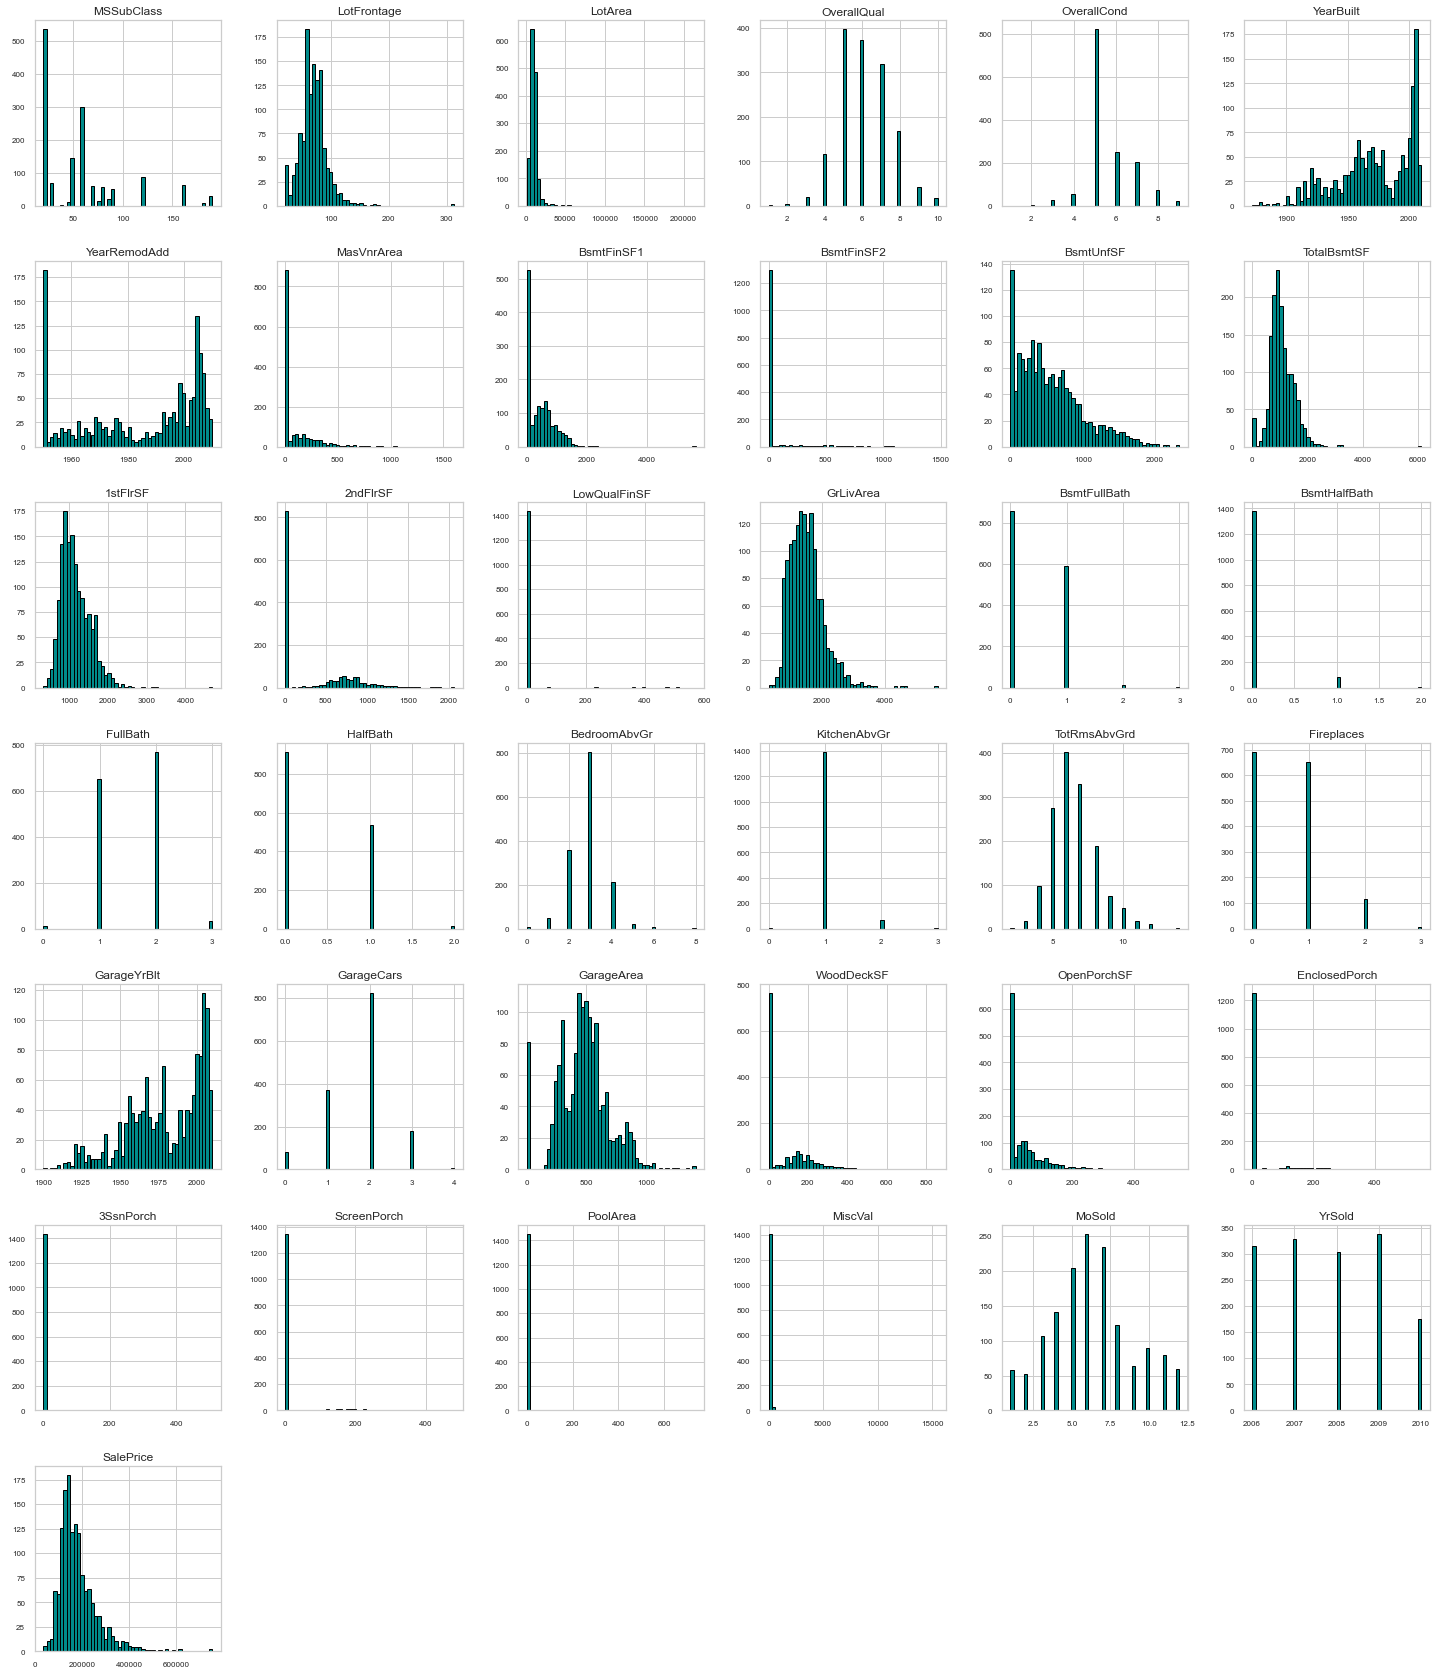

In [49]:
fig_ = df_train_num.hist(figsize=(25, 30), bins=50, color="darkcyan", edgecolor="black", xlabelsize=8, ylabelsize=8)

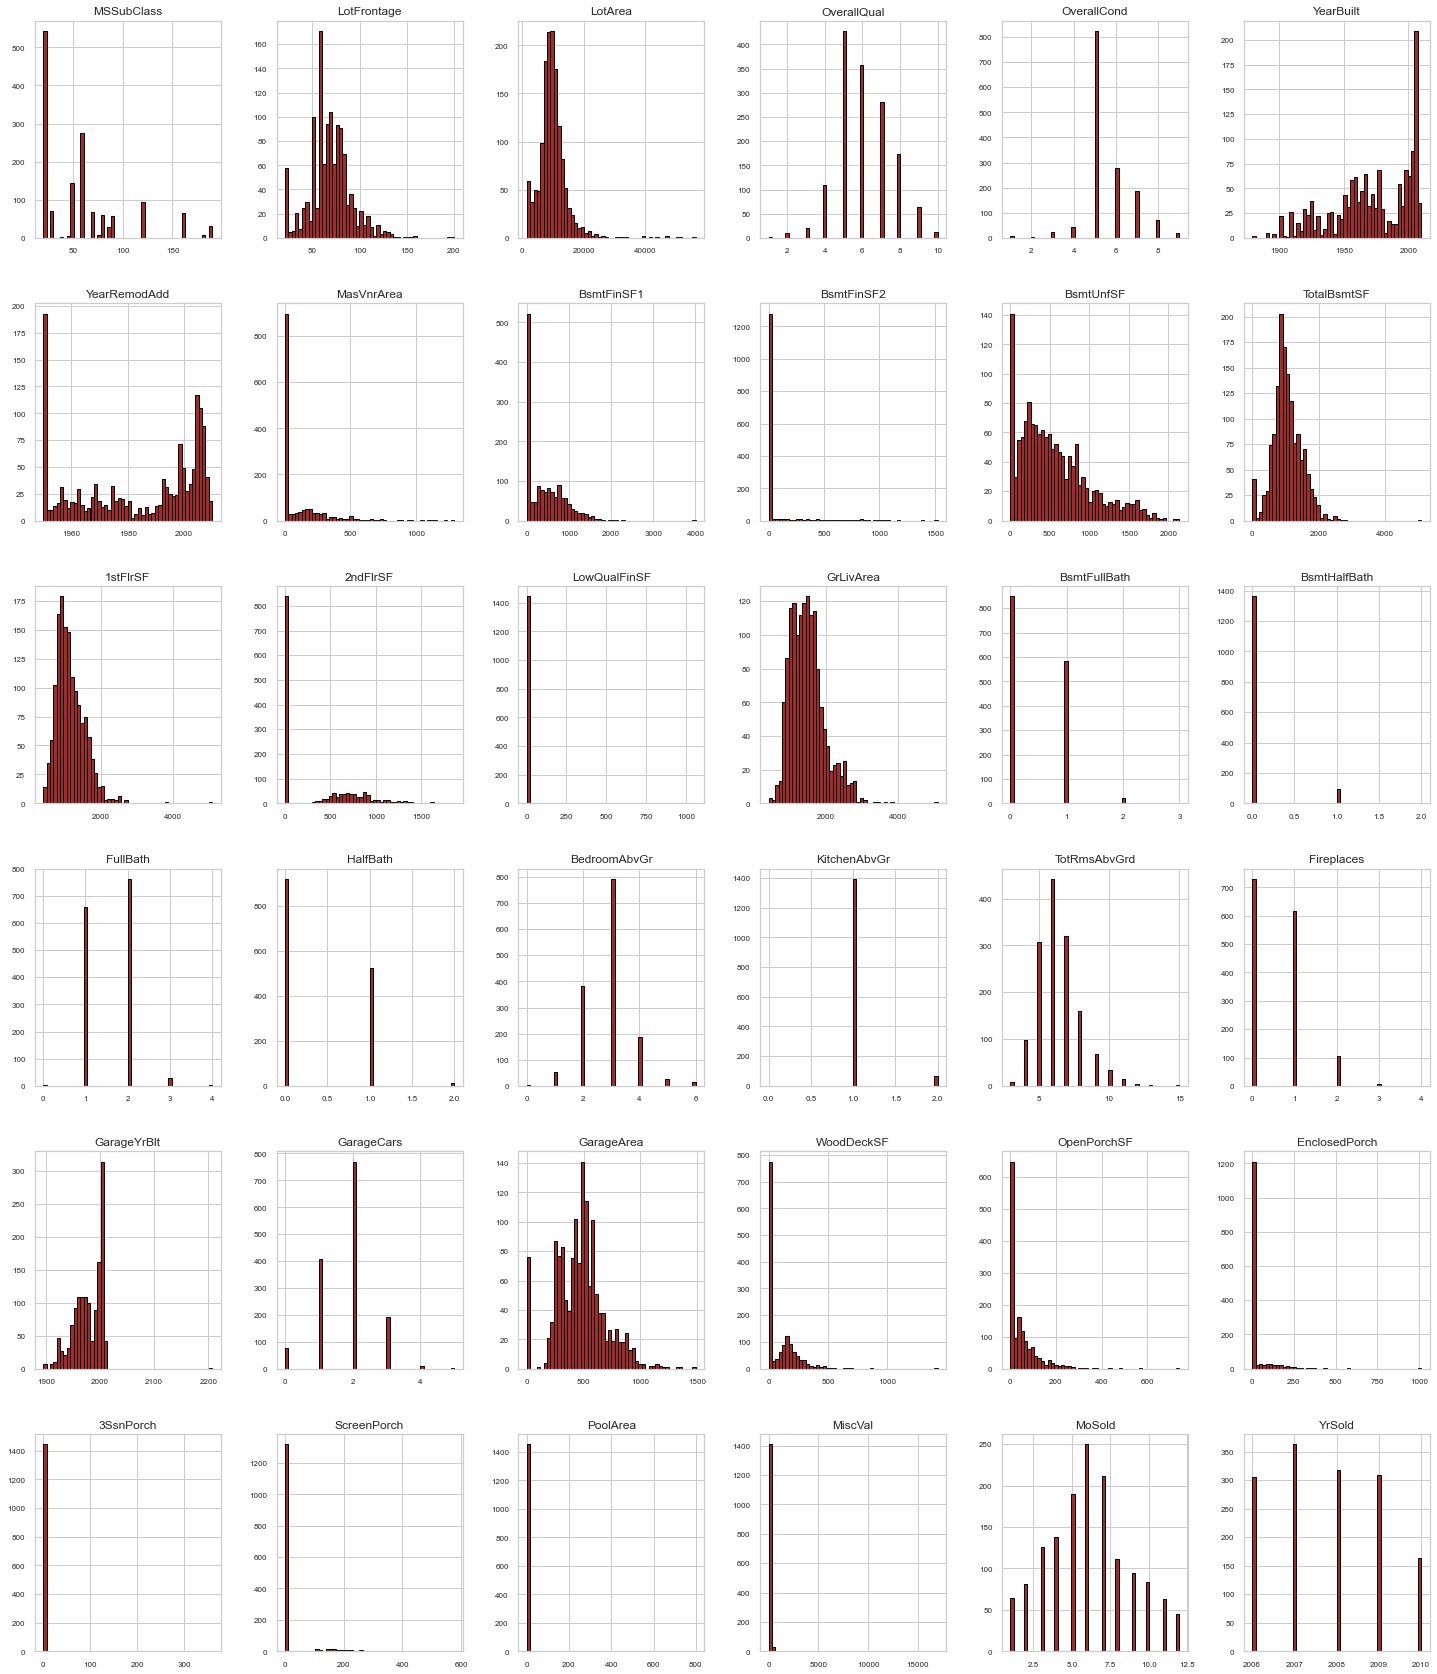

In [50]:
fig_ = df_test_num.hist(figsize=(25, 30), bins=50, color="brown", edgecolor="black", xlabelsize=8, ylabelsize=8)

Without a shadow of doubt, we can assert that both samples of interest come from the same population. Sweet! 

#### 1.2.1.3. Quasi-Constant variables

From the latter window of distributions, it is clearly noticeable that some features have pervasive values. The models we are about to train won’t learn anything insightful by keeping this feature in training set. So we are better off dropping this feature.

Let's drop quasi-constant features where 95% of the values are similar or constant. Check out [sklearn.feature_selection.VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) for a better understanding of the process followed below. 

In [51]:
# Displaying a specific colunm
df_train_num[:]['EnclosedPorch']

0         0
1         0
2         0
3       272
4         0
       ... 
1455      0
1456      0
1457      0
1458    112
1459      0
Name: EnclosedPorch, Length: 1460, dtype: int64

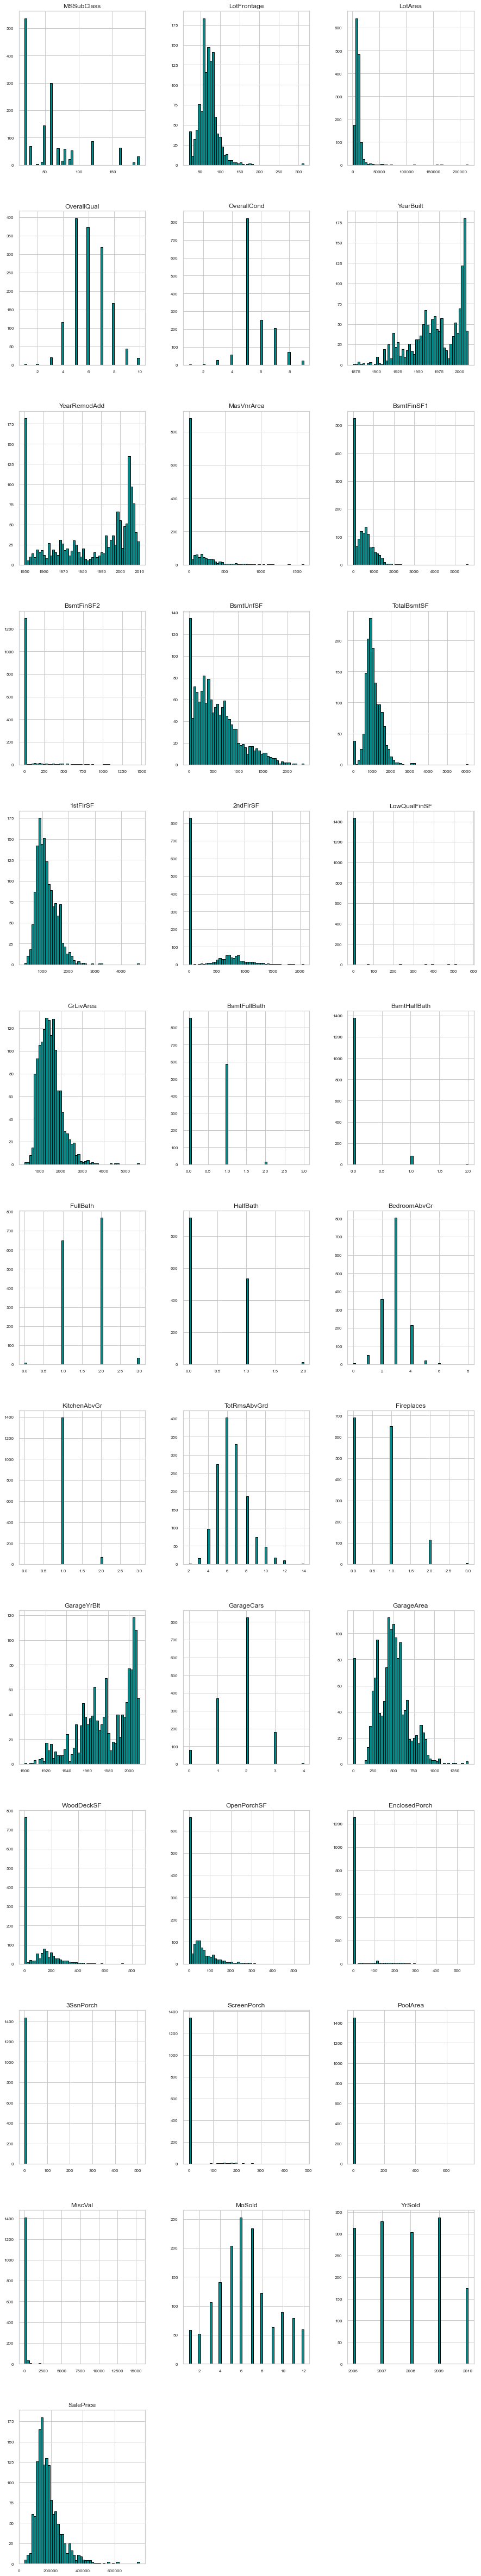

In [52]:
fig_ = df_train_num.hist(figsize=(15, 100), layout=(15,3),
                         bins=50, color="darkcyan", edgecolor="black", xlabelsize=8, ylabelsize=8)

In [53]:
sel = VarianceThreshold(threshold=0.05)
sel

VarianceThreshold(threshold=0.05)

In [54]:
sel.fit(df_train_num.iloc[:, :-1])

VarianceThreshold(threshold=0.05)

In [58]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [56]:
sum(sel.get_support())

35

In [57]:
len(df_train_num.iloc[:, :-1].columns) - sum(sel.get_support())

1

In [61]:
quasi_constant_features_list = [x for x in df_train_num.iloc[:, :-1].columns if x not in df_train_num.iloc[:, :-1].columns[sel.get_support()]]
quasi_constant_features_list

['KitchenAbvGr']

In [ ]:
sel = VarianceThreshold(threshold=0.05) # 0.05: drop column where 95% of the values are constant

# fit finds the features with constant variance
sel.fit(df_train_num.iloc[:, :-1])


# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")

print(f"\nNumber of quasi_constant features: {len(df_train_num.iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df_train_num.iloc[:, :-1].columns if x not in df_train_num.iloc[:, :-1].columns[sel.get_support()]]

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")

# Let's drop these columns from df_train_num
df_train_num.drop(quasi_constant_features_list, axis=1, inplace=True)

In [ ]:
# Checking the dimensions of the set obtained
print(df_train_num.shape)

In [62]:
print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")


Quasi-constant features to be dropped: ['KitchenAbvGr']


In [63]:
df_test_num.drop(quasi_constant_features_list, axis=1, inplace=True)

In [ ]:
sel = VarianceThreshold(threshold=0.05) # 0.05: drop column where 95% of the values are constant

# fit finds the features with constant variance
sel.fit(df_test_num.iloc[:, :-1])


# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")

print(f"\nNumber of quasi_constant features: {len(df_test_num.iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df_test_num.iloc[:, :-1].columns if x not in df_test_num.iloc[:, :-1].columns[sel.get_support()]]

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")

# Let's drop these columns from df_train_num
df_test_num.drop(quasi_constant_features_list, axis=1, inplace=True)

In [64]:
# Checking the dimensions of the set obtained
print(df_test_num.shape)

(1459, 35)


#### 1.2.1.4. Scatterplot

A straightforward and widely used vizualisation technique for accessing the relationship between two or more variables is the scatterplot. 

In fact, scatterplots show possible associations or relationships between two variables. However, just because your graph or chart shows something is going on, it doesn’t mean that a cause-and-effect relationship exists. So we better be careful with how we interpret the graphs obtained.  

Furthermore, a scatterplot can be used to assess the following features of your dataset:

* Check for outliers and unusual observations.
* Create a time series plot with irregular time-dependent data.
* Evaluate the fit of a regression model.

#### 1.2.1.4.1.  Relationship Assessment

In [ ]:
# Extracting column names as a list
# cols = list (df_train_num.columns)
# cols

In [ ]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_train_num.columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= "SalePrice", data=df_train_num, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

#### Interpretation

##### Form and Direction


One pattern of special interest is a linear pattern, where the data has a general look of a line going uphill or downhill. The red line shown on each graph is the fitted line from a linear regression. 

A linear relationship between X and Y exists when the pattern of X and Y-values is heading alongside the red line, either uphill (with a positive slope or positive correlation) or downhill (with a negative slope or negative correlation).

So, looking at the preceding figure, we can see that a positive linear relationship appears between the sale price and each predictors. That is, as the value assigned to the predictor standing for the potential of the house increases, the sale price increases as well. 

Note that the scatterplot only suggests a linear relationship between the two sets of values. It does not suggest that an increase in the sale price is a consequence of an increase in the house potential.

##### Strengh

Another important component to a scatterplot is the strength of the relationship between the two variables. The slope provides information on the strength of the relationship.

* The strongest linear relationship occurs when the slope is 1. This means that when one variable increases by one, the other variable also increases by the same amount. This line is at a 45 degree angle.

* The strength of the relationship between two variables is a crucial piece of information. Relying on the interpretation of a scatterplot is too subjective. More precise evidence is needed, and this evidence is obtained by computing a coefficient that measures the strength of the relationship under investigation.

#### 1.2.1.4.2. Correlation

A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. 

#### Pearson's Correlation

It is a powerful tool to summarize a large dataset and to gauge how far the independent variables are linearly related to the target variable. So let's check this out.

In [ ]:
# Heatmap for all the remaining numerical data including the taget 'SalePrice'

# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix 
# (method = pearson: standard correlation coefficient)
corr_matrix = df_train_num.corr(method = 'pearson')

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

##### Strengh of relationship

* |r| < 0.3 $\Rightarrow$ None or Very Weak
* 0.3 < |r| < 0.5 $\Rightarrow$ Weak
* 0.5 < |r| < 0.7 $\Rightarrow$ Moderate
* |r| > 0.7 $\Rightarrow$ Strong

Correlation around 0.7 or above suggest a strong relationship and only one of the two variables is needed in the analysis. This need to be dealt with when adressing the features selection. 

Thus, we will look at two kinds of correlation: Those between the variable of interest and the predictors and those  within independent variables.

As a result, we can deduce that there is a strong linear relationship between the sale price, our target variable and predictors cited in a descent order: 

* The overall quality of the material used and the finished house, which is without a doubt of shadow obvious.
* The living area above grade or ground,

Also, 8 predictors are moderately correlated with the dependent variable. To mention only a few:

* The size of garage in car capacity, looks like people care a lot about their cars confort :),
* The size of garage which was predicatable based on the previous customers expectation,
* The total square feet of basement erea,
* The first floor square feet, 
* etc.

Finally, we are left with 8 weakly correlated predictors for a cut-off value equals 30% namely:

* Year garage was built,
* Masonry veneer area,
* Number of fireplaces,
* Type 1 finished,
* etc.

As for the second type of correlation we are interested in, we have a very strong positive correlation (of at least 0.7) including variable below also lined up in a descent order:

* "GarageArea" and "GarageCars" 
* "GarageYrBlt" and "YearBuilt" 
* "TotRmsAbvGrd" and "GrLivArea" 
* "1stFlrSF" and "TotalBsmtSF" 

We recall that:

* "GarageYrBlt" stands for the year the garage was build,
* "YearBuilt" is the original construction date,
* "TotRmsAbvGrd" is the total rooms above grade not including the bathrooms.

In [ ]:
# Strongly Correlated Features
XSC = ["GarageCars", "GarageYrBlt", "1stFlrSF", "TotRmsAbvGrd"]
XSC

#### Wrapping up

In [ ]:
df_num_corr = df_train_num.corr()["SalePrice"][:-1]

#################################
# Correlated features (r2 > 0.7)
strong_features_list = df_num_corr[abs(df_num_corr) >= 0.7].sort_values(ascending=False)
print(f"{len(strong_features_list)} strongly correlated values with SalePrice:\n{strong_features_list}\n")

strong_features = df_num_corr[abs(df_num_corr) >= 0.7].index.tolist()
strong_features.append("SalePrice")

df_strong_features = df_train_num.loc[:, strong_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(strong_features) / 3), 2)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(strong_features)-1:
        sns.regplot(x=strong_features[i], y="SalePrice", data=df_strong_features, ax=ax, scatter_kws={
                    "color": "blue"}, line_kws={"color": "red"})

In [ ]:
######################################
# Correlated features (0.5 < r2 < 0.7)
moderate_features_list = df_num_corr[(abs(df_num_corr) < 0.7) & (abs(df_num_corr) >= 0.5)].sort_values(ascending=False)
print(f"{len(moderate_features_list)} moderately correlated values with SalePrice:\n{moderate_features_list}\n")

moderate_features = df_num_corr[(abs(df_num_corr) < 0.7) & (abs(df_num_corr) >= 0.5)].index.tolist()
moderate_features.append("SalePrice")

df_moderate_features = df_train_num.loc[:, moderate_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(moderate_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(moderate_features)-1:
        sns.regplot(x=moderate_features[i], y="SalePrice", data=df_moderate_features, ax=ax, scatter_kws={
                    "color": "cornflowerblue"}, line_kws={"color": "red"})

In [ ]:
######################################
# Correlated features (0.3 < r2 < 0.5)
weak_features_list = df_num_corr[(abs(df_num_corr) < 0.5) & (abs(df_num_corr) >= 0.3)].sort_values(ascending=False)
print(f"{len(weak_features_list)} weakly correlated values with SalePrice:\n{weak_features_list}")

# Features with low correlation (between 0.3 and 0.5)
weak_features = df_num_corr[(abs(df_num_corr) >= 0.3) & (
    abs(df_num_corr) < 0.5)].index.tolist()
weak_features.append("SalePrice")

df_weak_features = df_train_num.loc[:, weak_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(weak_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(weak_features) - 1:
        sns.regplot(x=weak_features[i], y="SalePrice", data=df_weak_features, ax=ax, scatter_kws={
                    "color": "deepskyblue"}, line_kws={"color": "red"},)

This piece of code below yields a summary output in terms of numbers regarding our recent interpretation. 

In [ ]:
# Define the list of numerical fetaures to keep
list_of_numerical_features = strong_features[:-1] + moderate_features[:-1] + weak_features

# Let's select these features form our train set
df_train_num = df_train_num.loc[:, list_of_numerical_features]

# The same features are selected from the test set (-1 -> except 'SalePrice')
df_test_num = df_test.loc[:, list_of_numerical_features[:-1]]

# Display except the last column
df_train_num.iloc[:, :-1]

#### Rank Correlation

In statistics, a rank correlation is any of several statistics that measure an ordinal association—the relationship between rankings of different ordinal variables or different rankings of the same variable, where a "ranking" is the assignment of the ordering labels "first", "second", "third", etc. to different observations of a particular variable. A rank correlation coefficient measures the degree of similarity between two rankings, and can be used to assess the significance of the relation between them. 

Some of the more popular rank correlation statistics include :

* Kendall's $\tau$
* Spearman's $\tau$  

[Source: Wikipedia](https://en.wikipedia.org/wiki/Rank_correlation#General_correlation_coefficient)

In this case, they can't be applied since we are dealing with numerical variables. 

#### Dropping Strongly Correlated Features

In [ ]:
# Training set
for i, col in enumerate(XSC):
    if col in df_train_num.columns:
        df_train_num.drop(col, axis=1, inplace=True)

# Checking if column headings are the same in both data sets
dif_3 = [x for x in XSC if x not in df_train_num.columns]
print(f"Columns present in XSC and absent in df_train_num: {dif_3}\n")

# Testing set
for i, col in enumerate(XSC):
    if col in df_test_num.columns:
        df_test_num.drop(col, axis=1, inplace=True)

# Checking if column headings are the same in both data sets
dif_4 = [x for x in XSC if x not in df_test_num.columns]
print(f"Columns present in XSC and absent in df_test_num: {dif_4}\n")

#### 1.2.1.4.3. Outliers

The correlation coefficient is based on means and standard deviations, so it is not robust to outliers; it is strongly affected by extreme observations. These
individuals are sometimes referred to as influential observations because they have a strong impact on the correlation coefficient.

As a result, when included in the analysis, it can reduces a strong relationship to a moderate relationship. This case makes such a big difference when the dataset contains a very small number of individuals. As a general rule, as the size of the sample increases, the influence of extreme observations decreases.

When describing the relationship between two variables, correlations are just one piece of the puzzle. This information is necessary, but not sufficient. Therefore, other analyses should also be conducted to provide more information.

[Source: Scatterplots and Correlation](https://drive.google.com/file/d/1N8_AUDO2bo16qFHEEqYmBjLpRiU2C8i8/view?usp=sharing)

Like box plots, scatterplots visualize outlying observations very well but do not identify or mark them for easy treatment. For instance, backing to our scatterplots, we can clearly see that some obersations are lying very far away from the line of statistical relationship regarding variables such as "LotFrontage", YearBuit", "GarageArea", etc. But how far can we consider them as extreme obeservations, specially in a multidimensional fashion?

Consequently, when dealing with multivariate outliers, distance metrics can be helpful for detection. With distance metrics, the distance between two vectors is determined. These two vectors can be two different observations (rows) or an observation (row) compared to the mean vector (row of means of all columns). Distance metrics can be calculated independently of the number of variables in the dataset (columns).

[Source: Detecting And Treating Outliers In Python — Part 2](https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-2-3a3319ec2c33)

#### 1.2.1.4.3.1. Bivariate Outliers detection Using Mahalanobis Distance

Mahalanobis Distance (MD) is an effective distance metric that finds the distance between the point and the distribution. It works quite effectively on multivariate data because it uses a covariance matrix of variables to find the distance between data points and the center. This means that MD detects outliers based on the distribution pattern of data points, unlike the Euclidean distance. 

[Source: Multivariate Outlier Detection in Python](https://towardsdatascience.com/multivariate-outlier-detection-in-python-e946cfc843b3)

In [ ]:
fig = plt.figure(figsize=(30,40))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.1,
                    hspace=0.3) 
for i, col in enumerate(df_train_num.iloc[:, :-1].columns):
    df = df_train_num[[col, 'SalePrice']]
    df = df.dropna()
    df = df.to_numpy()

    # Covariance matrix
    covariance  = np.cov(df , rowvar=False)

    # Covariance matrix power of -1
    covariance_pm1 = np.linalg.matrix_power(covariance, -1)

    # Center point
    centerpoint = np.mean(df , axis=0)

    # Distances between center point and 
    distances = []
    for j, val in enumerate(df):
            p1 = val
            p2 = centerpoint
            distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
            distances.append(distance)
    distances = np.array(distances)

    # Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
    cutoff = chi2.ppf(0.95, df.shape[1])

    # Index of outliers
    outlierIndexes = np.where(distances > cutoff )

    #print('--- Index of Outliers ----')
    #print(outlierIndexes)

    #print('--- Observations found as outlier -----')
    #print(df[ distances > cutoff , :])

    ## Finding ellipse dimensions 
    pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    lambda_, v = np.linalg.eig(covariance)
    lambda_ = np.sqrt(lambda_)
    
    # Ellipse patch   
    ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='blue')
    ellipse.set_facecolor('gold')
    ellipse.set_alpha(0.4)
    ax = plt.subplot(9, 2, i+1)
    ax.add_artist(ellipse)
    #ellipse.set_hatch('+')
    plt.scatter(df[: , 0], df[ : , 1])
    ax.text(.05, .95, col , transform=ax.transAxes, ha="left", va="top")

As we can see on the graphs obtained above, the points outside the ellipse are detected as outliers. This ellipse represents the area that wraps non-outlier values according to Mahalanobis Distance.

We will drop these outliers in the next subsection addressing that specially.

#### 1.2.1.4.3.2. Handling Outliers

Below are some of the methods of treating the outliers:

* Trimming/removing the outlier 
* Quantile based flooring and capping
* Mean/Median imputation

[Source: Detecting and Treating Outliers | Treating the odd one out!](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/)

For lack of relevant arguments to support the reliability of this techniques, we will move on to the next steps, bearing in mind that some analysis need to be done here.

### <font color='darkblue'>I.2.2. Missing data of Numerical features </font>

This subsection is intended to treat missing values among numerical features.

#### Training Data Set

In [ ]:
# Check the NaN of the train set by ploting percent of missing values per column
column_with_nan = df_train_num.columns[df_train_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_train_num[i].isnull().sum()*100/len(df_train_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="darkmagenta")

p.set_title("Percent of NaN per column of the train set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

Thus, from the graph obtained above, two numerical variables contain missing values: 
* The linear feet of street connected to property (17%)
* The masonry veneer area (about 0.6%)

A possible solution to fix this problem is about filling the missing values by the median because the distributions of both variables are skewed. 

In [ ]:
# Imputation of missing values (NaNs) with SimpleImputer
my_imputer = SimpleImputer(strategy="median")
df_train_imputed = pd.DataFrame(my_imputer.fit_transform(df_train_num))
df_train_imputed.columns = df_train_num.columns

The next step is now to look at the distibutions of these features before and after imputation.  

In [ ]:
# Define figure parameters
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2)

# Plot the results
for feature, fig_pos in zip(["LotFrontage", "MasVnrArea"], [0, 1]):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df_train_num[feature],
                     kde=True, bins=30, color="dodgerblue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_train_imputed[feature],
                     kde=True, bins=30, color="firebrick", edgecolor="black")
    q.set_ylabel(f"After imputation", fontsize=14)

Without a shadow of doubt, the shape of the first distribution is affected by this imputation performed on the observations. Consequently, this operation is a failure on the first variable and we can't consequently proceed with that. 



In [ ]:
# Drop 'LotFrontage' from the training set
df_train_imputed.drop(["LotFrontage"], axis=1, inplace=True)

# Drop the same features from testing set 
df_test_num.drop(["LotFrontage"], axis=1, inplace=True)

df_train_imputed.head()

About the second feature, the trajectory of the distribution remains untouched. Therefore, imputing the median on this column is successful. 

#### Testing Data Set

In [ ]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_test_num.columns[df_test_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_test_num[i].isnull().sum()*100/len(df_test_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="darkmagenta")

p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In conntrast to the training set, here we have for features containing missing values in their observations. The highest one is the masonry veneer area (about 1%). So, let's apply the same procedure, that's imputation by the median. 

In [ ]:
# Imputation of missing values (NaNs) with SimpleImputer
my_imputer = SimpleImputer(strategy="median")
df_test_imputed = pd.DataFrame(my_imputer.fit_transform(df_test_num))
df_test_imputed.columns = df_test_num.columns

In [ ]:
# Let's check the distribution of each imputed feature before and after imputation
# Define figure parameters
sns.set(rc={"figure.figsize": (20, 18)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(4, 2)

# Plot the results
for feature, fig_pos in zip(tab["Column"].tolist(), range(0, 6)):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df_test_num[feature],
                     kde=True, bins=30, color="dodgerblue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_test_imputed[feature],
                     kde=True, bins=30, color="firebrick", edgecolor="black",)
    q.set_ylabel(f"After imputation", fontsize=14)

No major change in the shape of the distributions. Thus, by imputing these missing data, few errors were introduced and the distributions are similar before and after imputation. Hence, the imputation operation is a success. 

### <font color='forestgreen'>  I.3. Categorical features <front>

### <font color='darkblue'>I.3.1. Explore and clean Categorical features</font>

This section will focus on categorical features in our pool explanatory variables. The first step will consist of separating thos features of interest from both data sets and then processing them. 

#### 1.3.1.1. Extracting Categorical Features

In [ ]:
# Categorical to Quantitative relationship
categorical_features = [i for i in df_train.columns if df_train.dtypes[i] == "object"]
categorical_features.append("SalePrice")

# Train set
df_train_categ = df_train[categorical_features]

# Test set (-1 because test set don't have 'Sale Price')
df_test_categ = df_test[categorical_features[:-1]]

In [ ]:
print(f"Training set shape (Categorical features): {df_train_categ.shape}\n")
print(f"Test set shape (Categorical features): {df_test_categ.shape}\n")

As displayed, we have 43 categorical varaibles in the training data set as well as in the testing data set. 

The next setp now is to look at the Countplot for each of the categorical features in the training set in order to determine which categorical features are dominated by one outcome. This method is used to show the counts of observations in each categorical feature using bars.

#### 1.3.1.2. Counter Plots

In [ ]:
fig, axes = plt.subplots(round(len(df_train_categ.columns) / 3), 2, figsize=(20, 30))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=df_train_categ.columns[i], alpha=0.7, data=df_train_categ, ax=ax, palette = "Set1")

fig.tight_layout()

A count plot can be thought of as a histogram across a categorical, instead of quantitative variable. As a result, we don't want those predictors with a prevalent outcome because they don't contribute significantly to training our model. It's quite similar to the issue of quasi-constant variable we dealed with regarding numerical features. So, ww will drop these concerned feature in the folowing snippet of code.  

[Source: seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)

In [ ]:
cols_to_drop = [
    'Street',
    'LandContour',
    'Utilities',
    'LandSlope',
    'Condition2',
    'RoofMatl',
    'BsmtCond',
    'BsmtFinType2',
    'Heating',
    'CentralAir',
    'Electrical',
    'Functional',
    'GarageQual',
    'GarageCond',
    'PavedDrive'
]

# Training set
df_train_categ.drop(cols_to_drop, axis=1, inplace=True)

# Test set
df_test_categ.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
print(f"Training set shape (Categorical features): {df_train_categ.shape}\n")
print(f"Test set shape (Categorical features): {df_test_categ.shape}\n")

We are left now with exactly 28 categorical features in both data sets. 

Secondly, it's worth a look at the variation of the target variable with respect to each categorical feature.

#### 1.3.1.3. Box Plots 

In [ ]:
fig, axes = plt.subplots(
    round(len(df_train_categ.columns)/3), 2, figsize=(20, 30))

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(df_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_train_categ.columns[i], y="SalePrice", data=df_train_categ, ax=ax, palette="Spectral_r")

fig.tight_layout()

Looking thoroughly at each of these sets of box plots, we can notice that some feature tend to have similar behavior regarding some of their outcomes or categories. Thus, a formal way of accessing this is the so-called Chi-Square Test. 

#### 1.3.1.4 Chi-Square Test

There are two types of chi-square tests. Both use the chi-square statistic and distribution for different purposes:

* A chi-square goodness of fit test determines if sample data matches a population.

* A chi-square test for independence compares two variables in a contingency table to see if they are related. In a more general sense, it tests to see whether distributions of categorical variables differ from each another.

The second type is of interest here. 

[Source: Chi-Square Statistic: How to Calculate It / Distribution](https://www.statisticshowto.com/probability-and-statistics/chi-square/)

There are three pairs of categorical variables for which the distribution of sale price is very similar:

* "Exterior1st" and "Exterior2nd"
* "ExterQual" and "MasVnrType"
* "BsmtQual" and "BsmtExposure"

In [ ]:
# Plot contingency table

sns.set(rc={"figure.figsize": (10, 7)})

X = ["Exterior1st", "ExterQual", "BsmtQual"]
Y = ["Exterior2nd", "MasVnrType", "BsmtExposure"]

for i, j in zip(X, Y):

    # Contingency table
    cont = df_train_categ[[i, j]].pivot_table(
        index=i, columns=j, aggfunc=len, margins=True, margins_name="Total")
    tx = cont.loc[:, ["Total"]]
    ty = cont.loc[["Total"], :]
    n = len(df_train_categ)
    indep = tx.dot(ty) / n
    c = cont.fillna(0)  # Replace NaN with 0 in the contingency table
    measure = (c - indep) ** 2 / indep
    xi_n = measure.sum().sum()
    table = measure / xi_n

    # Plot contingency table
    p = sns.heatmap(table.iloc[:-1, :-1],
                    annot=c.iloc[:-1, :-1], fmt=".0f", cmap="Oranges")
    p.set_xlabel(j, fontsize=18)
    p.set_ylabel(i, fontsize=18)
    p.set_title(f"\nχ² test between groups {i} and groups {j}\n", size=18)
    plt.show()

    # Performing Chi-sq test
    CrosstabResult = pd.crosstab(
        index=df_train_categ[i], columns=df_train_categ[j])
    ChiSqResult = chi2_contingency(CrosstabResult)
    # P-Value is the Probability of H0 being True
    print(
        f"P-Value of the ChiSq Test bewteen {i} and {j} is: {ChiSqResult[1]}\n")

After performing the Chi-squared test for each pairs of variables considered, we see that there is strong co-dependency for each of these variables. Since highly dependent/correlated variables do not add much relevant new information with regards to the value of the target variable, we will drop one of each co-dependent variable from the dataset.

In [ ]:
# Drop the one of each co-dependent variables
# Training set
df_train_categ.drop(Y, axis=1, inplace=True)

# Test set
df_test_categ.drop(Y, axis=1, inplace=True)

In [ ]:
print(f"Training set shape (Categorical features): {df_train_categ.shape}\n")
print(f"Test set shape (Categorical features): {df_test_categ.shape}\n")

Eventually, we have 25 categorical features in our pool now. About a half of what we had initially has been dropped by conducting this cleaning operation.  

### <font color='darkblue'>I.3.2. Missing data of Categorical features</font>

#### 1.3.2.1. Training Set

In [ ]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_train_categ.columns[df_train_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_train_categ[i].isnull().sum() * 100 / len(df_train_categ), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="orchid")
p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [ ]:
# Displaying the exact percentages
tab

In the training set, it's clearly vewable that five categorical variables have a significant amount of missing values, that's larger than 50%. Hence, we will remove any columns with more than 30% NaN entries from both datasets. Imputation will be used to fill in the missing entries from the remaining columns in the training set using the modal class.

In [ ]:
# Drop categorical columns that have at least 30% missing values
large_na = [col for col in column_with_nan if (df_train_categ[col].isna().sum()/df_train_categ.shape[0]) > 0.3]

print("Columns to be dropped:")
print(large_na)

df_train_categ.drop(large_na, axis=1, inplace=True)

In [ ]:
# Fill the NaN of each feature by the corresponding modal class
categ_fill_null = {"GarageType": df_train_categ["GarageType"].mode().iloc[0],
                   "GarageFinish": df_train_categ["GarageFinish"].mode().iloc[0],
                   "BsmtQual": df_train_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": df_train_categ["BsmtFinType1"].mode().iloc[0]}

df_train_categ = df_train_categ.fillna(value=categ_fill_null)


The columns that have been deleted in the training set must also be deleted in the testing set so that the two data sets remain identical for the modeling and prediction.

In [ ]:
# Drop the same categorical columns from the test set
df_test_categ.drop(large_na, axis=1, inplace=True)

#### 1.3.2.2. Testing Set

In [ ]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_test_categ.columns[df_test_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_test_categ[i].isnull().sum() * 100 / len(df_test_categ), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="orchid")
p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

Apparently, columns in the test dataset have also missing values, but none of them have more than 6% missing values. Therefore, we will fill in each NaN entry for each feature using it's corresponding modal class as we did before.

In [ ]:
# Fill the NaN of each feature by the corresponding modal class

# Fill the NaN of each feature by the corresponding modal class
categ_fill_null = {"GarageType": df_test_categ["GarageType"].mode().iloc[0],
                   "GarageFinish": df_test_categ["GarageFinish"].mode().iloc[0],
                   "BsmtQual": df_test_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": df_test_categ["BsmtFinType1"].mode().iloc[0],
                   "MSZoning": df_test_categ["MSZoning"].mode().iloc[0],
                   "Exterior1st": df_test_categ["Exterior1st"].mode().iloc[0],
                   "KitchenQual": df_test_categ["KitchenQual"].mode().iloc[0],
                   "SaleType": df_test_categ["SaleType"].mode().iloc[0]}

df_test_categ = df_test_categ.fillna(value=categ_fill_null)


In [ ]:
print(f"Training set shape (Categorical features): {df_train_categ.shape}\n")
print(f"Test set shape (Categorical features): {df_test_categ.shape}\n")

At the end of the day, we have 20 categorical predictors in our data sets now to move forwad in our analysis.  

### <font color='darkblue'>I.3.3. Transform Categorical features into Binary features</font>

Before combining the categorical data with the numerical data obtained after cleansing, we need to transform the categorical entries into numerical entries. This will be done using the get_dummies() function where each categorical feature will be transformed into a binary feature.

In [ ]:
# Drop the SalePrice column from the training dataset
df_train_categ.drop(["SalePrice"], axis = 1, inplace = True)

# Use get_dummies to transform the Categorical features into Binary features (Training dataset)
df_train_dummies = pd.get_dummies(df_train_categ)
df_train_dummies.head()

In [ ]:
# Apply get_dummies to the test dataset as well
df_test_dummies = pd.get_dummies(df_test_categ)
df_test_dummies.head()

For precaution, let's check if the column headings are the same in both data sets just transformed. 

In [ ]:
# Check if the column headings are the same in both data sets: data_train_dummies and data_test_dummies
dif_1 = [x for x in df_train_dummies.columns if x not in df_test_dummies.columns]
print(f"Features present in df_train_categ and absent in df_test_categ: {dif_1}\n")

dif_2 = [x for x in df_test_dummies.columns if x not in df_train_dummies.columns]
print(f"Features present in df_test_categ set and absent in df_train_categ: {dif_2}")

Three of these columns from the training dataset are not present in the test dataset. Thus they will be dropped from the training dataset to ensure that both datasets have exactly the same features.

In [ ]:
# Drop the columns listed in dif_1 from data_train_dummies
df_train_dummies.drop(dif_1, axis=1, inplace=True)

# Check again if the column headings are the same in both data sets: data_train_dummies and data_test_dummies
dif_1 = [x for x in df_train_dummies.columns if x not in df_test_dummies.columns]
print(f"Features present in df_train_categ and absent in df_test_categ: {dif_1}\n")

dif_2 = [x for x in df_test_dummies.columns if x not in df_test_dummies.columns]
print(f"Features present in df_test_categ set and absent in df_train_categ: {dif_2}")

Perfect! What about the shape of both datasets now?

In [ ]:
print(f"Training set shape (Categorical features): {df_train_dummies.shape}\n")
print(f"Test set shape (Categorical features): {df_test_dummies.shape}\n")

### <font color='forestgreen'>I.4. Merge numerical and binary features into one data set</font>

This short part aims to join numerical and categorical datasets together before priming the modeling. 

In [ ]:
# Training set
df_train_new = pd.concat([df_train_imputed, df_train_dummies], axis = 1)
print(f"Train set: {df_train_new.shape}")

# Test set
df_test_new = pd.concat([df_test_imputed, df_test_dummies], axis = 1)
print(f"Test set: {df_test_new.shape}")

### <font color='forestgreen'>I.5. Drop outliers from the train set</font>

In [ ]:
# Let's handle the outliers in "GrLivArea", "TotalBsmtSF" and "GarageArea"
# Outliers in "GrLivArea"
outliers1 = df_train_new[(df_train_new["GrLivArea"] > 4000) & (
    df_train_new["SalePrice"] <= 300000)].index.tolist()

# Outliers in "TotalBsmtSF"
outliers2 = df_train_new[(df_train_new["TotalBsmtSF"] > 4000) & (
    df_train_new["SalePrice"] <= 200000)].index.tolist()

# List of all the outliers
outliers = outliers1 + outliers2
outliers = list(set(outliers))
print(outliers)

# Drop these outlier
df_train_new = df_train_new.drop(df_train_new.index[outliers])

# Reset index
df_train_new = df_train_new.reset_index().drop("index", axis=1)

# <font color='goldenrod'> II. Feature engineering </font>

The Year of construction and the Year of Remodelling variables will be transformed into new variables representing the Age of the House and the Age since the house was remodelled - this will enable us to apply a log transformation to normalize those variables. After the transformation, the variables "YearBuilt" and "YearRemodAdd" will be removed.

In [ ]:
# Convert Year of construction to the Age of the house since the construction
df_train_new["AgeSinceConst"] = (df_train_new["YearBuilt"].max() - df_train_new["YearBuilt"])

df_test_new["AgeSinceConst"] = (df_test_new["YearBuilt"].max() - df_test_new["YearBuilt"])

# Drop "YearBuilt"
df_train_new.drop(["YearBuilt"], axis=1, inplace=True)
df_test_new.drop(["YearBuilt"], axis=1, inplace=True)

In [ ]:
# Convert Year of remodeling to the Age of the house since the remodeling
df_train_new["AgeSinceRemod"] = (df_train_new["YearRemodAdd"].max() - df_train_new["YearRemodAdd"])

df_test_new["AgeSinceRemod"] = (df_test_new["YearRemodAdd"].max() - df_test_new["YearRemodAdd"])

# Drop "YearRemodAdd"
df_train_new.drop(["YearRemodAdd"], axis=1, inplace=True)
df_test_new.drop(["YearRemodAdd"], axis=1, inplace=True)

In [ ]:
df_test_new.head()

Now, we consider the continuous numerical variables that are skewed. A Log transformation will be applied to the skewed numerical variables to help mitigate the strong variation of some variables, and to reduce redundancy. The continuous features are defined below.

In [ ]:
continuous_features = ["OverallQual", "TotalBsmtSF", "GrLivArea",
                       "FullBath", "GarageArea","MasVnrArea", "Fireplaces", "AgeSinceConst", "AgeSinceRemod"]
df_skew_verify = df_train_new.loc[:, continuous_features]
df_skew_verify.head()

To obtain the skewed features, we take out variables that are more than 50% skewed.

In [ ]:
df_skew_verify = df_train_new.loc[:, continuous_features]

# Select features with absolute Skew higher than 0.5
skew_ft = []

for i in continuous_features:
    # list of skew for each corresponding feature
    skew_ft.append(abs(df_skew_verify[i].skew()))

df_skewed = pd.DataFrame({"Columns": continuous_features, "Abs_Skew": skew_ft})


sk_features = df_skewed[df_skewed["Abs_Skew"] > 0.5]["Columns"].tolist()
print(f"List of skewed features: {sk_features}")

A log transformation can now be applied to the skewed features listed above.

In [ ]:
# Log transformation of the skewed features
for i in sk_features:
    # loop over i (features) to calculate Log of surfaces
    # Training set
    df_train_new[i] = np.log((df_train_new[i])+1)
    
    # Test set
    df_test_new[i] = np.log((df_test_new[i])+1)

Looking at the distribution of the numerical features right from the begining, we can notice that "SalePrice" is skewed as well. To help normalize this variable, a log transformation will be applied to "SalePrice" as well.

In [ ]:
# Log transformation of the target variable "SalePrice"
df_train_new["SalePriceLog"] = np.log(df_train_new.SalePrice)

# Drop the original SalePrice
df_train_new.drop(["SalePrice"], axis=1, inplace=True)

In [ ]:
df_train_new

In [ ]:
numerical_cols_new = [cname for cname in df_train_new.columns if 
                      df_train_new[cname].dtype in ['int64', 'float64']]

df_train_new_num = df_train_new[numerical_cols_new].copy()

# Plot the distribution of all the numerical features
fig_ = df_train_new_num.hist(figsize=(30, 35), bins=50, color="darkviolet",
                               edgecolor="black", xlabelsize=8, ylabelsize=8)

Looking at the distribution of the numerical features, we notice that most of the previously skewed variables have a more normal distribution with exception of the Age variables, which should result in better predictons.

# <font color='goldenrod'>III.  Preparing data for modeling</font>

We cannot fit and evaluate machine learning algorithms on raw data; instead, we must transform the data to meet the requirements of individual machine learning algorithms. More than that, we must choose a representation for the data that best exposes the unknown underlying structure of the prediction problem to the learning algorithms in order to get the best performance given our available resources on this predictive modeling project.

To achieve this goal, we will follow the steps below:

### <font color='forestgreen'>III.1. Split data into train and test set and Standardization

In [ ]:
# Extract the features (X) and the target (y)
# Features (X)
X = df_train_new[[i for i in list(
    df_train_new.columns) if i != "SalePriceLog"]]
print(X.shape)

# Target (y)
y = df_train_new.loc[:, "SalePriceLog"]
print(y.shape)

In [ ]:
# Split into X_train and X_test (by stratifying on y)
# Stratify on a continuous variable by splitting it in bins
# Create the bins.
bins = np.linspace(0, len(y), 150)
y_binned = np.digitize(y, bins)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y_binned, shuffle=True)
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

In [ ]:
from sklearn import preprocessing

# Standardize the data
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)
# The same standardization is applied for df_test_new
df_test_new = std_scale.transform(df_test_new)


# The output of standardization is a vector. Let's turn it into a table
# Convert X, y and test data into dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
df_test_new = pd.DataFrame(df_test_new, columns=X.columns)

y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index().drop("index", axis=1)

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index().drop("index", axis=1)

### <font color='forestgreen'>III.2. Backward Stepwise Regression<font>

Backward Stepwise Regression is a stepwise regression approach that begins with a full (saturated) model and at each step gradually eliminates variables from the regression model to find a reduced model that best explains the data. Also known as Backward Elimination regression.

In [ ]:
Selected_Features = []


def backward_regression(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_in -- pvalue threshold of features to keep
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X_train, y_train)

In [ ]:
# Keep the selected features only
X_train = X_train.loc[:, Selected_Features[0]]
X_test = X_test.loc[:, Selected_Features[0]]
df_test_new = df_test_new.loc[:, Selected_Features[0]]

### <font color='forestgreen'>III.3. Variance Inflation Factor (VIF) <font>

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.

A feature with a VIF higher than 10 implies (5 is also common) that there is a multi-collinearity with the latter.

In [ ]:
# Here I calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_train.values, i) for i in range(X_train.shape[1])]

# VIF results in a table
vif["features"] = X_train.columns
vif.round(1)

In [ ]:
# Select features with high VIF
high_vif_list = vif[vif["VIF Factor"] > 10]["features"].tolist()

if len(high_vif_list) == 0:
    # print empty list if low multicolinearity
    print(f"None of the features have a high multicollinearity")
else:
    # print list of features with high multicolinearity
    print(f"List of features with high multicollinearity: {high_vif_list}")

There are two features with high multicolinearity. Let's drop them from both the training and the testing set. 

In [ ]:
# Drop features with high multicollinearity from X_train, X_test and df_test_new
X_train.drop(high_vif_list, axis=1, inplace=True)

X_test.drop(high_vif_list, axis=1, inplace=True)

df_test_new.drop(high_vif_list, axis=1, inplace=True)

### <font color='forestgreen'>III.4. Cook distance<font>

By calculating Cook distance we can detect influential observations in a regression model. Cook distance detects data with large residuals (outliers) that can distort the prediction and the accuracy of a regression.

In [ ]:
X_constant = sm.add_constant(X_train)

model = sm.OLS(y_train, X_constant)
lr = model.fit()

# Cook distance
np.set_printoptions(suppress=True)

# Create an instance of influence
influence = lr.get_influence()

# Get Cook's distance for each observation
cooks = influence.cooks_distance

# Result as a dataframe
cook_df = pd.DataFrame({"Cook_Distance": cooks[0], "p_value": cooks[1]})
cook_df.head()

In [ ]:
# Remove the influential observation from X_train and y_train
influent_observation = cook_df[cook_df["p_value"] < 0.05].index.tolist()
print(f"Influential observations dropped: {influent_observation}")

# Drop these obsrevations
X_train = X_train.drop(X_train.index[influent_observation])
y_train = y_train.drop(y_train.index[influent_observation])

No influencial observation detected based on Cook distance. 

# <font color='goldenrod'>IV. Modeling</font>

### Outlines

For this section, six supervised learning models will be considered:

* Linear Regression
* Ridge Regression
* Lasso Regression
* Decision Tree Regressor
* Random Forest Regressor
* XGBoost Regressor

To measure model performance and their predicitons the RMSE and R^{2} scores will be used, and 5-fold cross-validation will also be used.

### Importing Libraries

In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

### Defining Models

In [ ]:
model_lin = LinearRegression()
model_ridge = Ridge(alpha = 0.001)
model_lasso = Lasso(alpha = 0.001)
model_tree = DecisionTreeRegressor()
model_ran = RandomForestRegressor()
model_xg = XGBRegressor()

### Defining Performance Metrics

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Define a function for each metric
# R²
def rsqr_score(test, pred):
    """Calculate R squared score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score 
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred, model):
    """Print calculated score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"**** Regressor: {model} ****")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

### <font color='forestgreen'>IV.1. Linear Regression <font>

In [ ]:
scores_lin = cross_val_score(model_lin, X_train, y_train,
                 cv=5)

print("Mean scores (Linear Model):\n", np.mean(scores_lin))
print("Standard deviation of scores (Linear Model):\n", np.std(scores_lin))

In [ ]:
scores_lin

In [ ]:
model_lin.fit(X_train, y_train)
y_pred_lin = model_lin.predict(X_test)
print_score(y_test, y_pred_lin, "Linear")

In [ ]:
# Save the model results into lists
model_list = []
r2_list = []
rmse_list = []

model_list.append(model_lin.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_lin), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_lin), 4))

In [ ]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Linear)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_lin),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### <font color='forestgreen'>IV.2. Rigide Regression <font>

In [ ]:
scores_ridge = cross_val_score(model_ridge, X_train, y_train,
                 cv=5)

print("Mean scores (Ridge Model):\n", np.mean(scores_ridge))
print("Standard deviation of scores (Ridge Model):\n", np.std(scores_ridge))

In [ ]:
scores_ridge_mse = -1 * cross_val_score(model_ridge, X_train, y_train,
                      cv=5,
                      scoring='neg_mean_squared_error')

print("MSE scores (Ridge Model):\n", scores_ridge_mse)
print("Mean MSE scores:", scores_ridge_mse.mean())

In [ ]:
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
print_score(y_test, y_pred_ridge, "Ridge")

In [ ]:
# Save the model results into lists
model_list.append(model_ridge.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_ridge), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_ridge), 4))

In [ ]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Ridge)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_ridge),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

#### <font color='darkblue'>Hyperparamter Tuning (Ridge)</font>

In [ ]:
# Define hyperparameters
alphas = np.linspace(0, 10, 100).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
ridge_cv = GridSearchCV(Ridge(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
ridge_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train): {ridge_cv.best_score_}")

In [ ]:
model_ridge_opt = Ridge(alpha = ridge_cv.best_params_["alpha"])
model_ridge_opt.fit(X_train, y_train)
y_pred_ridge_opt = model_ridge_opt.predict(X_test)
print_score(y_test, y_pred_ridge_opt, "Ridge")

In [ ]:
# Save the model results into lists
model_list.append(model_ridge_opt.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_ridge_opt), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_ridge_opt), 4))

In [ ]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Ridge - Optimal alpha value)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_ridge_opt),
            color="blue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### <font color='forestgreen'> IV.3. Lasso Regression <font>

In [ ]:
scores_lasso = cross_val_score(model_lasso, X_train, y_train,
                                cv=5)

print("Mean scores (Lasso Model):\n", np.mean(scores_lasso))
print("Standard deviation of scores (Lasso Model):\n", np.std(scores_lasso))

In [ ]:
scores_lasso_mse = -1 * cross_val_score(model_lasso, X_train, y_train,
                                      cv=5,
                                      scoring='neg_mean_squared_error')

print("MSE scores (Lasso Model):\n", scores_lasso_mse)
print("Mean MSE scores:", scores_lasso_mse.mean())

In [ ]:
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)
print_score(y_test, y_pred_lasso, "Lasso")

In [ ]:
# Save the model results into lists
model_list.append(model_lasso.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_lasso), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_lasso), 4))

In [ ]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Lasso)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_lasso),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

#### <font color='darkblue'>Hyperparamter Tuning (Lasso)</font>

In [ ]:
# Define hyperparameters
alphas = np.logspace(-5, 5, 100).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
lasso_cv = GridSearchCV(Lasso(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
lasso_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lasso_cv.best_params_}")
print(f"Best R² (train): {lasso_cv.best_score_}")

In [ ]:
model_lasso_opt = Lasso(alpha = lasso_cv.best_params_["alpha"])

model_lasso_opt.fit(X_train, y_train)
y_pred_lasso_opt = model_lasso_opt.predict(X_test)
print_score(y_test, y_pred_lasso_opt, "Lasso")

In [ ]:
# Save the model results into lists
model_list.append(model_lasso_opt.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_lasso_opt), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_lasso_opt), 4))

In [ ]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Lasso - Optimal alpha value)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_lasso_opt),
            color="blue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### <font color='forestgreen'> IV.4. Random Forest Regressor <font> 

In [ ]:
scores_ran = cross_val_score(model_ran, X_train, y_train,
                            cv=5)

print("Mean scores (Random Forest Model):\n", np.mean(scores_ran))
print("Standard deviation of scores (Random Forest Model):\n", np.std(scores_ran))

In [ ]:
scores_ran_mse = -1 * cross_val_score(model_ran, X_train, y_train,
                                      cv=5,
                                      scoring='neg_mean_squared_error')

print("MSE scores (Random Forest Model):\n", scores_ran_mse)
print("Mean MSE scores:", scores_ran_mse.mean())

In [ ]:
model_ran.fit(X_train, y_train)
y_pred_ran = model_ran.predict(X_test)
print_score(y_test, y_pred_ran, "Random Forest")

In [ ]:
# Save the model results into lists
model_list.append(model_ran.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_ran), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_ran), 4))

In [ ]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Random Forest)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_ran),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

 ### <font color='forestgreen'> IV.5. XGBoost Regression <font> 

In [ ]:
# Define hyperparameters
tuned_parameters_xgb = {"max_depth": [3],
                        "colsample_bytree": [0.3, 0.7],
                        "learning_rate": [0.01, 0.05, 0.1],
                        "n_estimators": [100, 500, 1000]}

# GridSearch
xgbr_cv = GridSearchCV(estimator=XGBRegressor(),
                       param_grid=tuned_parameters_xgb,
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

# fit the GridSearch on train set
xgbr_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {xgbr_cv.best_params_}\n")
print(f"Best R²: {xgbr_cv.best_score_}")

In [ ]:
model_xgb_opt = XGBRegressor(colsample_bytree = xgbr_cv.best_params_["colsample_bytree"],
                             learning_rate = xgbr_cv.best_params_["learning_rate"],
                             max_depth = xgbr_cv.best_params_["max_depth"],
                             n_estimators = xgbr_cv.best_params_["n_estimators"])

model_xgb_opt.fit(X_train, y_train)
y_pred_xgb_opt = model_xgb_opt.predict(X_test)
print_score(y_test, y_pred_xgb_opt, "XGBoost")

In [ ]:
# Save the model results into lists
model_list.append(model_xgb_opt.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_xgb_opt), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_xgb_opt), 4))

In [ ]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (XGBoost Regressor)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_xgb_opt),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [ ]:
# Create a table with pd.DataFrame
model_results = pd.DataFrame({"Model": model_list,
                              "R²": r2_list,
                              "RMSE": rmse_list})

model_results

The results of this modeling are showing that the best performance in terms of R squared (R²) correspond to XGB Regressor. With regards to Residual Mean Square Error (RMSE), all these models are doing well except XGB Regressor which achieved a better performance. 

Thus, XGB Regressor will be chosen to predict house prices on the test set of this Kaggle project.

# <font color='goldenrod'>V. Prediction </font>

In [ ]:
# Prediction of House Prices using the Optimal Lasso Regression Model

y_pred = np.exp(model_xgb_opt.predict(df_test_new))

output = pd.DataFrame({"Id": Id_test_list,"SalePrice": y_pred})


In [ ]:
y_pred

In [ ]:
# Save the output
output.to_csv("submission5.csv", index=False)
output.head(10)